In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
X = dataset.iloc[:, 3:13]
y=dataset.iloc[:,13]

In [4]:

geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [5]:
X=pd.concat([X,geography,gender],axis=1)

In [6]:
X=X.drop(['Geography','Gender'],axis=1)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)




In [8]:
pip install tensorflow


  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.67.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl (2.0 kB)
   ---------------------------------------- 0.0/385.2 MB ? eta

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [13]:
classifier = Sequential()


In [17]:

classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))


In [18]:
classifier.add(Dense( units = 6 , kernel_initializer = 'he_uniform' , activation = 'relu'))

In [19]:
classifier.add(Dense(units=1 , kernel_initializer = 'glorot_uniform' , activation = 'sigmoid'))

In [20]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
model_history = classifier.fit(X_train , y_train , validation_split=0.33 , batch_size = 10 , epochs=100 )

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7582 - loss: 0.5618 - val_accuracy: 0.7952 - val_loss: 0.4984
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7872 - loss: 0.5063 - val_accuracy: 0.7967 - val_loss: 0.4804
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8040 - loss: 0.4688 - val_accuracy: 0.7997 - val_loss: 0.4691
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7939 - loss: 0.4756 - val_accuracy: 0.8005 - val_loss: 0.4604
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8081 - loss: 0.4473 - val_accuracy: 0.8001 - val_loss: 0.4544
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8053 - loss: 0.4461 - val_accuracy: 0.8039 - val_loss: 0.4498
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8149 - loss: 0.4340 - val_accuracy: 0.8050 - val_loss: 0.4464
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8042 - loss: 0.4528 - val_accu

In [23]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [35]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1512,   83],
       [ 202,  203]], dtype=int64)

In [28]:

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8575

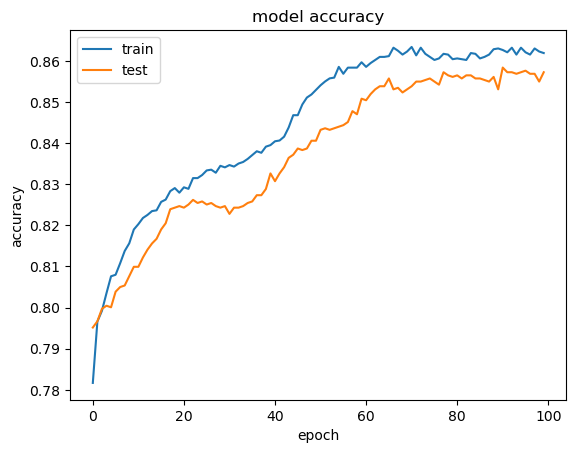

In [32]:

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



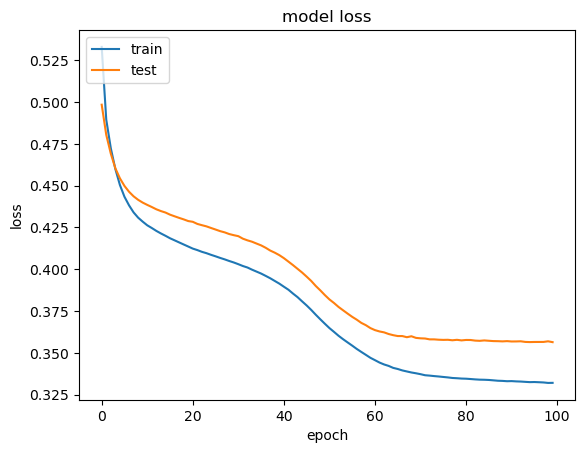

In [33]:

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

